In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import nltk
import string
import tensorflow_hub as hub
import tensorflow as tf
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DTS MLT2/tweets.csv',delimiter=',',encoding='latin-1')
df.head()

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTS MLT2/tweets.csv")

y = data["target"]

In [ ]:
data

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
X = data["text"]

In [ ]:
X_for_tree = data[["keyword", "location"]]

In [ ]:
X[:10]

0    Communal violence in Bhainsa, Telangana. "Ston...
1    Telangana: Section 144 has been imposed in Bha...
2    Arsonist sets cars ablaze at dealership https:...
3    Arsonist sets cars ablaze at dealership https:...
4    "Lord Jesus, your love brings freedom and pard...
5    If this child was Chinese, this tweet would ha...
6    Several houses have been set ablaze in Ngemsib...
7    Asansol: A BJP office in Salanpur village was ...
8    National Security Minister, Kan Dapaah's side ...
9    This creature who’s soul is no longer clarent ...
Name: text, dtype: object

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
X = pd.Series(map(clean_text, X))

In [ ]:
X[:10]

0    communal violence in bhainsa telangana stones ...
1    telangana section  has been imposed in bhainsa...
2             arsonist sets cars ablaze at dealership 
3            arsonist sets cars ablaze at dealership  
4    lord jesus your love brings freedom and pardon...
5    if this child was chinese this tweet would hav...
6    several houses have been set ablaze in ngemsib...
7    asansol a bjp office in salanpur village was s...
8    national security minister kan dapaahs side ch...
9    this creature who’s soul is no longer clarent ...
dtype: object

In [ ]:
nltk.download('punkt')
X = [nltk.word_tokenize(sentence) for sentence in X]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,communal,violence,in,bhainsa,telangana,stones,were,pelted,on,muslims,...,some,houses,and,vehicles,were,set,ablaze…,None,None,None
1,telangana,section,has,been,imposed,in,bhainsa,from,january,to,...,erupted,between,two,groups,on,january,po…,None,None,None
2,arsonist,sets,cars,ablaze,at,dealership,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,arsonist,sets,cars,ablaze,at,dealership,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,lord,jesus,your,love,brings,freedom,and,pardon,fill,me,...,holy,spirit,and,set,my,heart,ablaze,with,your,l…


In [ ]:
nltk.download('stopwords')
nltk.corpus.stopwords.words('english')[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we']

In [ ]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,communal,violence,in,bhainsa,telangana,stones,were,pelted,on,muslims,...,some,houses,and,vehicles,were,set,ablaze…,None,None,None
1,telangana,section,has,been,imposed,in,bhainsa,from,january,to,...,erupted,between,two,groups,on,january,po…,None,None,None
2,arsonist,sets,cars,ablaze,at,dealership,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,arsonist,sets,cars,ablaze,at,dealership,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,lord,jesus,your,love,brings,freedom,and,pardon,fill,me,...,holy,spirit,and,set,my,heart,ablaze,with,your,l…


In [ ]:
def remove_stopwords(text):
    words = [w for w in text if w not in nltk.corpus.stopwords.words('english')]
    return words

X = list(map(remove_stopwords, X))

In [ ]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,communal,violence,bhainsa,telangana,stones,pelted,muslims,houses,houses,vehicles,set,ablaze…,None
1,telangana,section,imposed,bhainsa,january,clash,erupted,two,groups,january,po…,None,None
2,arsonist,sets,cars,ablaze,dealership,None,None,None,None,None,None,None,None
3,arsonist,sets,cars,ablaze,dealership,None,None,None,None,None,None,None,None
4,lord,jesus,love,brings,freedom,pardon,fill,holy,spirit,set,heart,ablaze,l…


In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [ ]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3988,686,1479,1568,2615,3989.0,1045.0,636.0,636.0,1223.0,151.0,6490.0,NaN
1,1568,2112,6491,1479,173,2323.0,2113.0,30.0,1670.0,173.0,2114.0,NaN,NaN
2,1569,2324,1224,909,6492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1569,2324,1224,909,6492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1153,743,56,1792,1291,10149.0,4878.0,1480.0,3990.0,151.0,105.0,909.0,687.0


Average length of tweet: 10.001671064204047


(array([ 277.,  617.,  968., 2594., 2806., 2549., 1376.,  147.,   25.,
          11.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

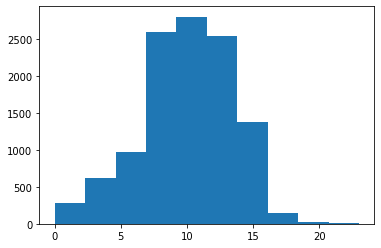

In [ ]:
print("Average length of tweet:", sum(map(len, X))/len(X))
plt.hist([len(tweet) for tweet in X])

Text(0.5, 1.0, 'Fake')

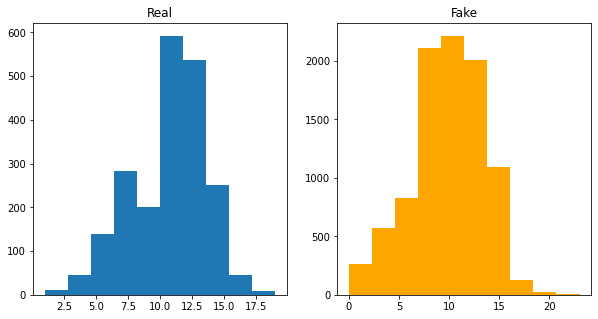

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist([len(X[i]) for i in range(len(X)) if y[i]==1])
ax1.set_title("Real")
ax2.hist([len(X[i]) for i in range(len(X)) if y[i]==0], color="orange")
ax2.set_title("Fake")

In [ ]:
count=0
for tweet in X:
    if len(tweet) > 20:
        count+=1
print((len(X)-count) / len(X))

0.999032541776605


In [ ]:
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=20, padding="post")

In [ ]:
def preprocess(text_sequence):
    text_sequence = pd.Series(map(clean_text, text_sequence))    
    text_sequence = [nltk.word_tokenize(sentence) for sentence in text_sequence]
    text_sequence = list(map(remove_stopwords, text_sequence))    
    text_sequence =  tokenizer.texts_to_sequences(text_sequence)
    text_sequence = keras.preprocessing.sequence.pad_sequences(text_sequence, maxlen=20, padding="post") 
    return text_sequence

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
X_train_tree, X_valid_tree, y_train, y_valid = train_test_split(X_for_tree, y, stratify=y, random_state=42)

In [ ]:
k_encoder = LabelEncoder()
X_train_tree["keyword"] = k_encoder.fit_transform(X_train_tree["keyword"])
X_valid_tree["keyword"] = k_encoder.transform(X_valid_tree["keyword"])

l_encoder = LabelEncoder()
X_train_tree["location"] = l_encoder.fit_transform(X_train_tree["location"])

In [ ]:
temp = np.array(X_valid_tree["location"])

for index in range(len(temp)):
    if temp[index] not in l_encoder.classes_:
        temp[index] = np.nan
        
X_valid_tree["location"] = temp
X_valid_tree["location"] = l_encoder.transform(X_valid_tree["location"])

In [ ]:
def make_model(iter = 1, hidden=100):
    Input = keras.Input(shape=[20])

    x = keras.layers.Reshape((20, 1))(Input)
    
    for _ in range(iter):
        x = keras.layers.Bidirectional(keras.layers.LSTM(hidden, return_sequences=True))(x)
        
    x = keras.layers.Bidirectional(keras.layers.LSTM(hidden))(x)
    x = keras.layers.Dense((hidden+40)/2, activation="relu")(x)
    output = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=Input, outputs=output)
    model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")
    return model

In [ ]:
model = make_model(1, 100)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
267/267 [==============================] - 34s 97ms/step - loss: 0.4730 - accuracy: 0.8111 - val_loss: 0.4628 - val_accuracy: 0.8139
Epoch 2/30
267/267 [==============================] - 22s 82ms/step - loss: 0.4629 - accuracy: 0.8141 - val_loss: 0.4751 - val_accuracy: 0.8139
Epoch 3/30
267/267 [==============================] - 21s 80ms/step - loss: 0.4613 - accuracy: 0.8141 - val_loss: 0.4610 - val_accuracy: 0.8139
Epoch 4/30
267/267 [==============================] - 21s 79ms/step - loss: 0.4610 - accuracy: 0.8141 - val_loss: 0.4637 - val_accuracy: 0.8139
Epoch 5/30
267/267 [==============================] - 23s 88ms/step - loss: 0.4660 - accuracy: 0.8141 - val_loss: 0.4704 - val_accuracy: 0.8139
Epoch 6/30
267/267 [==============================] - 21s 80ms/step - loss: 0.4648 - accuracy: 0.8141 - val_loss: 0.4675 - val_accuracy: 0.8139
Epoch 7/30
267/267 [==============================] - 21s 79ms/step - loss: 0.4636 - accuracy: 0.8141 - val_loss: 0.4620 - val_accuracy:

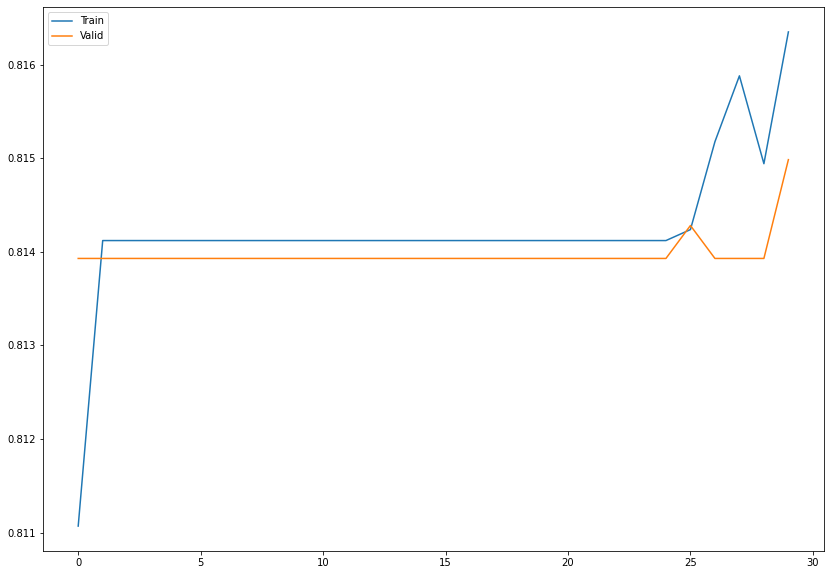

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Valid")
plt.legend()

In [ ]:
model.evaluate(X_valid, y_valid)

89/89 [==============================] - 2s 19ms/step - loss: 0.4587 - accuracy: 0.8150


[0.45865556597709656, 0.814984142780304]